## Diana Ortiz 
"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Business Understanding 

#### Predicting Movie Success

- It is important to be able to predict which movies are more likely to fail or succeed before the release of such because it could benefit the production houses to know how much money to spend on a campaign as well as how to approach the campaign visually.
- It also helps them to know which is the best date to release the movie.
- From a consumer point of view it is hard to know if a movie is going to be good because they have to wait for the critic's reviews or just go by instinct based on a trailer but both of those can be unreliable. 



#### Goal 

- The goal of this project is to predict movie success and see the correlation of that success with different categories such as the genre of the movie, the duration, the imdb score, among many others. 
- Being able to identify the correlation between different categories will allow us to know which ones affect the success or failure of a movie 

- If I were hired as a data/business analyst to predict how well a movie will perform in theaters I would collect the earnings of the movie, the imdb score, the budget the movie had, the duration, genre and social media reviews. 

In [414]:
corr = pd.DataFrame(df.corr()['imdbscore'].drop('imdbscore'))
corr.sort_values(['imdbscore'], ascending = False)

,imdbscore
numvotedusers,0.410965
numcriticforreviews,0.302807
numuserforreviews,0.292475
duration,0.260890
moviefacebooklikes,0.247049
gross,0.198021
directorfacebooklikes,0.170802
casttotalfacebooklikes,0.085787
actor2facebooklikes,0.083808
actor1facebooklikes,0.076099


What variables are highly correlated to imdb score?

- Number of users who gave a review
- Number of critical reviews on imdb 
- Duration
- Number of facebook likes in the movie page 
- Gross earnings of the movie in dollars
- Number of likes of the director on his facebook page 

# Data Understanding

In [1055]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from pandas.tools import plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [1056]:
# read data
df=pd.read_csv("data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [1057]:
df.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [1058]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [1059]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003930B390>,
      dtype=object)

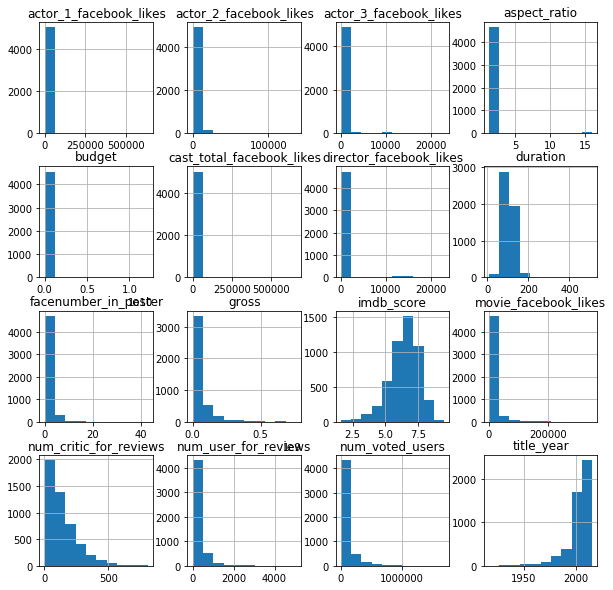

In [1060]:
df.hist(figsize=(10,10))

In [1061]:
# describe for duration
df['duration'].describe()

count    5028.000000
mean     107.201074 
std      25.197441  
min      7.000000   
25%      93.000000  
50%      103.000000 
75%      118.000000 
max      511.000000 
Name: duration, dtype: float64

In [1062]:
# describe for a single column
df['imdb_score'].describe()

count    5043.000000
mean     6.442138   
std      1.125116   
min      1.600000   
25%      5.800000   
50%      6.600000   
75%      7.200000   
max      9.500000   
Name: imdb_score, dtype: float64

In [1063]:
df.isnull().sum()

color                        19 
director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_2_name                 13 
actor_1_facebook_likes       7  
gross                        884
genres                       0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         13 
plot_keywords                153
movie_imdb_link              0  
num_user_for_reviews         21 
language                     12 
country                      5  
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
dtype: int64

# Data Preparation 

In [1064]:
#rename columns 
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('_', '')
df.columns = df.columns.str.lower()
df.head() 

,color,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,movieimdblink,numuserforreviews,language,country,contentrating,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [1065]:
# remove unnecessary columns

df = df.drop(['color', 'contentrating'], axis=1)
df.head()

,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,plotkeywords,movieimdblink,numuserforreviews,language,country,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [1066]:
# remove unnecessary columns

df = df.drop(['plotkeywords', 'movieimdblink'], axis=1)
df.head()

,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,numuserforreviews,language,country,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,USA,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [1067]:
df['duration'].describe()

count    5028.000000
mean     107.201074 
std      25.197441  
min      7.000000   
25%      93.000000  
50%      103.000000 
75%      118.000000 
max      511.000000 
Name: duration, dtype: float64

In [1068]:
df['numcriticforreviews'].describe()

count    4993.000000
mean     140.194272 
std      121.601675 
min      1.000000   
25%      50.000000  
50%      110.000000 
75%      195.000000 
max      813.000000 
Name: numcriticforreviews, dtype: float64

In [1069]:
df['budget'].describe()

count    4.551000e+03
mean     3.975262e+07
std      2.061149e+08
min      2.180000e+02
25%      6.000000e+06
50%      2.000000e+07
75%      4.500000e+07
max      1.221550e+10
Name: budget, dtype: float64

In [1070]:
df['aspectratio'].describe()

count    4714.000000
mean     2.220403   
std      1.385113   
min      1.180000   
25%      1.850000   
50%      2.350000   
75%      2.350000   
max      16.000000  
Name: aspectratio, dtype: float64

In [1071]:
df = df.fillna({'duration': 107.0, 'numcriticforreviews': 140.0, 'budget':397000000.0, 'aspectratio': 2.22})
df.isnull().sum()

directorname              104
numcriticforreviews       0  
duration                  0  
directorfacebooklikes     104
actor3facebooklikes       23 
actor2name                13 
actor1facebooklikes       7  
gross                     884
genres                    0  
actor1name                7  
movietitle                0  
numvotedusers             0  
casttotalfacebooklikes    0  
actor3name                23 
facenumberinposter        13 
numuserforreviews         21 
language                  12 
country                   5  
budget                    0  
titleyear                 108
actor2facebooklikes       13 
imdbscore                 0  
aspectratio               0  
moviefacebooklikes        0  
dtype: int64

# Business Intelligence

In [1072]:
df.index

RangeIndex(start=0, stop=5043, step=1)

### Summarizing IMDB Score

In [1073]:
df['imdbscore'].unique()

array([7.9, 7.1, 6.8, 8.5, 6.6, 6.2, 7.8, 7.5, 6.9, 6.1, 6.7, 7.3, 6.5,
       7.2, 8.1, 7. , 7.7, 8.2, 5.9, 6. , 5.7, 6.4, 6.3, 5.6, 8.3, 8. ,
       8.4, 5.8, 5.4, 9. , 4.8, 5.2, 7.6, 4.5, 5.5, 8.6, 8.8, 5.1, 7.4,
       4.2, 5. , 4.9, 3.7, 5.3, 4.3, 3.8, 4.4, 3.3, 2.2, 8.9, 8.7, 4.6,
       2.4, 3.4, 4.1, 4.7, 3. , 3.6, 3.5, 2.7, 1.7, 4. , 2. , 9.3, 2.9,
       3.9, 2.8, 2.3, 1.9, 3.1, 9.5, 9.1, 1.6, 2.5, 2.1, 3.2, 9.2, 2.6])

In [1074]:
df['imdbscore'].value_counts()

6.7    223
6.6    201
7.2    195
6.5    186
6.4    185
7.3    184
7.0    184
7.1    181
6.8    181
6.1    179
6.3    176
6.2    175
6.9    174
7.4    147
5.9    144
7.5    140
6.0    131
7.6    124
5.8    124
5.7    117
7.7    114
5.6    112
7.8    106
5.4    104
5.5    98 
5.3    92 
8.0    75 
7.9    75 
5.1    71 
8.1    69 
       .. 
3.5    15 
3.9    14 
3.8    14 
3.6    14 
8.7    13 
3.4    12 
2.8    9  
3.7    9  
3.1    8  
8.8    7  
3.2    7  
2.7    6  
3.0    5  
8.9    5  
2.9    4  
2.2    3  
2.1    3  
1.9    3  
9.0    3  
9.1    3  
2.3    3  
2.5    2  
2.0    2  
2.4    2  
2.6    2  
9.3    1  
1.7    1  
9.5    1  
9.2    1  
1.6    1  
Name: imdbscore, Length: 78, dtype: int64

In [1075]:
df['imdbscore'].nunique()

78

In [1076]:
df['imdbscore'].describe()

count    5043.000000
mean     6.442138   
std      1.125116   
min      1.600000   
25%      5.800000   
50%      6.600000   
75%      7.200000   
max      9.500000   
Name: imdbscore, dtype: float64

In [1077]:
#Top 10 longest movies 
df.sort_values(by='duration', ascending=False).head(10)

,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,numuserforreviews,language,country,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes
1710,NaN,16.0,511.0,NaN,51.0,Ingvar Eggert Sigurðsson,147.0,NaN,Crime|Drama|Thriller,Ólafur Darri Ólafsson,Trapped,2308,307,Björn Hlynur Haraldsson,0.0,19.0,Icelandic,Iceland,397000000.0,NaN,63.0,8.2,16.00,0
2466,NaN,108.0,334.0,NaN,30.0,Nora von Waldstätten,897.0,145118.0,Biography|Crime|Drama|Thriller,Edgar Ramírez,Carlos,10111,1032,Katharina Schüttler,0.0,36.0,English,France,397000000.0,NaN,30.0,7.7,2.35,0
1501,Taylor Hackford,12.0,330.0,138.0,672.0,Jesse Borrego,848.0,4496583.0,Crime|Drama,Delroy Lindo,"Blood In, Blood Out",23181,3227,Raymond Cruz,2.0,129.0,English,USA,35000000.0,1993.0,674.0,8.0,1.66,6000
1144,Michael Cimino,102.0,325.0,517.0,678.0,Sam Waterston,12000.0,1500000.0,Adventure|Drama|Western,Jeff Bridges,Heaven's Gate,9830,14255,Isabelle Huppert,0.0,189.0,English,USA,44000000.0,1980.0,849.0,6.8,2.35,1000
3311,Chatrichalerm Yukol,31.0,300.0,6.0,6.0,Chatchai Plengpanich,7.0,454255.0,Action|Adventure|Drama|History|War,Sarunyu Wongkrachang,The Legend of Suriyothai,1666,32,Mai Charoenpura,3.0,47.0,Thai,Thailand,400000000.0,2001.0,6.0,6.6,1.85,124
2970,Wolfgang Petersen,96.0,293.0,249.0,18.0,Martin Semmelrogge,362.0,11433134.0,Adventure|Drama|Thriller|War,Jürgen Prochnow,Das Boot,168203,469,Herbert Grönemeyer,0.0,426.0,German,West Germany,14000000.0,1981.0,21.0,8.4,1.85,11000
1571,Francis Ford Coppola,261.0,289.0,0.0,3000.0,Marlon Brando,11000.0,78800000.0,Drama|War,Harrison Ford,Apocalypse Now,450676,25313,Robert Duvall,1.0,983.0,English,USA,31500000.0,1979.0,10000.0,8.5,2.35,19000
2727,NaN,9.0,286.0,NaN,527.0,Tom Hollander,857.0,NaN,Drama|History|Thriller,Anna Silk,The Company,3828,3809,Alessandro Nivola,3.0,39.0,English,USA,397000000.0,NaN,555.0,7.9,1.78,733
883,Ron Maxwell,84.0,280.0,33.0,67.0,Bruce Boxleitner,789.0,12870569.0,Drama|History|War,Billy Campbell,Gods and Generals,13215,1671,John Castle,0.0,497.0,English,USA,56000000.0,2003.0,640.0,6.3,2.35,953
1980,Ron Maxwell,22.0,271.0,33.0,251.0,William Morgan Sheppard,854.0,10769960.0,Drama|History|War,Tom Berenger,Gettysburg,21940,2107,James Patrick Stuart,0.0,256.0,English,USA,25000000.0,1993.0,702.0,7.7,1.85,0


In [1078]:
#Top 10 movies with highest imdb scores

df.sort_values('imdbscore', ascending=False).head(10)

,directorname,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor2name,actor1facebooklikes,gross,genres,actor1name,movietitle,numvotedusers,casttotalfacebooklikes,actor3name,facenumberinposter,numuserforreviews,language,country,budget,titleyear,actor2facebooklikes,imdbscore,aspectratio,moviefacebooklikes
2765,John Blanchard,140.0,65.0,0.0,176.0,Andrea Martin,770.0,NaN,Comedy,Martin Short,Towering Inferno,10,1125,Joe Flaherty,2.0,NaN,English,Canada,397000000.0,NaN,179.0,9.5,1.33,0
1937,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,13495,Bob Gunton,0.0,4144.0,English,USA,25000000.0,1994.0,745.0,9.3,1.85,108000
3466,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,Al Pacino,The Godfather,1155770,28122,Robert Duvall,1.0,2238.0,English,USA,6000000.0,1972.0,10000.0,9.2,1.85,43000
4409,John Stockwell,2.0,90.0,134.0,354.0,T.J. Storm,260000.0,NaN,Action,Matthew Ziff,Kickboxer: Vengeance,246,261818,Sam Medina,5.0,1.0,NaN,USA,17000000.0,2016.0,454.0,9.1,2.22,0
2824,NaN,53.0,55.0,NaN,2.0,Olaf Lubaszenko,20.0,447093.0,Drama,Krystyna Janda,Dekalog,12590,25,Olgierd Lukaszewicz,0.0,37.0,Polish,Poland,397000000.0,NaN,3.0,9.1,1.33,0
3207,NaN,53.0,55.0,NaN,2.0,Olaf Lubaszenko,20.0,447093.0,Drama,Krystyna Janda,Dekalog,12591,25,Olgierd Lukaszewicz,0.0,37.0,Polish,Poland,397000000.0,NaN,3.0,9.1,1.33,0
66,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,4667.0,English,USA,185000000.0,2008.0,13000.0,9.0,2.35,37000
2837,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57300000.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,39960,Robert Duvall,1.0,650.0,English,USA,13000000.0,1974.0,14000.0,9.0,1.85,14000
3481,NaN,54.0,53.0,NaN,1000.0,Adam Goldberg,4000.0,NaN,Crime|Drama|Thriller,Kirsten Dunst,Fargo,170055,19949,Oliver Platt,0.0,173.0,English,USA,397000000.0,NaN,1000.0,9.0,1.78,61000
339,Peter Jackson,328.0,192.0,0.0,416.0,Billy Boyd,5000.0,377019252.0,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,6434,Bernard Hill,2.0,3189.0,English,USA,94000000.0,2003.0,857.0,8.9,2.35,16000


In [1079]:
#Top 10 movies with highest imdb scores

df.groupby('movietitle')['imdbscore'].sum().sort_values(ascending=False).head(10)


movietitle
Halloween                    23.7
King Kong                    21.6
The Fast and the Furious     20.1
Home                         20.1
Dekalog                      18.2
Ben-Hur                      18.2
Victor Frankenstein          18.0
Pan                          17.4
Snatch                       16.6
Godzilla Resurgence          16.4
Name: imdbscore, dtype: float64

In [1080]:
#Lowest imdb score 
df.groupby(['imdbscore', 'movietitle']).mean().head(10)

numcriticforreviews  duration  \
imdbscore movietitle                                                       
1.6       Justin Bieber: Never Say Never   84.0                 115.0      
1.7       Foodfight!                       12.0                 91.0       
1.9       Disaster Movie                   111.0                88.0       
          Superbabies: Baby Geniuses 2     32.0                 88.0       
          The Helix... Loaded              3.0                  97.0       
2.0       United Passions                  7.0                  110.0      
          Who's Your Caddy?                25.0                 93.0       
2.1       Crossover                        25.0                 95.0       
          From Justin to Kelly             60.0                 90.0       
          Glitter                          66.0                 104.0      

                                           directorfacebooklikes  \
imdbscore movietitle                                               
1.6       Justin Bieber: Never Say Never   209.0                   
1.7       Foodfight!                       11.0                    
1.9       Disaster Movie                   82.0                    
          Superbabies: Baby Geniuses 2     84.0                    
          The Helix... Loaded              0.0                     
2.0       United Passions                  18.0                    
          Who's Your Caddy?                70.0                    
2.1       Crossover                        17.0                    
          From Justin to Kelly             7.0                     
          Glitter                          170.0                   

                                           actor3facebooklikes  \
imdbscore movietitle                                             
1.6       Justin Bieber: Never Say Never   41.0                  
1.7       Foodfight!                       500.0                 
1.9       Disaster Movie                   329.0                 
          Superbabies: Baby Geniuses 2     177.0                 
          The Helix... Loaded              94.0                  
2.0       United Passions                  432.0                 
          Who's Your Caddy?                442.0                 
2.1       Crossover                        255.0                 
          From Justin to Kelly             251.0                 
          Glitter                          202.0                 

                                           actor1facebooklikes       gross  \
imdbscore movietitle                                                         
1.6       Justin Bieber: Never Say Never   569.0                73000942.0   
1.7       Foodfight!                       719.0               NaN           
1.9       Disaster Movie                   869.0                14174654.0   
          Superbabies: Baby Geniuses 2     650.0                9109322.0    
          The Helix... Loaded              639.0               NaN           
2.0       United Passions                  922.0               NaN           
          Who's Your Caddy?                692.0                5694308.0    
2.1       Crossover                        592.0                7009668.0    
          From Justin to Kelly             525.0                4922166.0    
          Glitter                          736.0                4273372.0    

                                           numvotedusers  \
imdbscore movietitle                                       
1.6       Justin Bieber: Never Say Never   74351.0         
1.7       Foodfight!                       4377.0          
1.9       Disaster Movie                   74945.0         
          Superbabies: Baby Geniuses 2     25371.0         
          The Helix... Loaded              534.0           
2.0       United Passions                  3279.0          
          Who's Your Caddy?                13815.0         
2.1       Crossover                        

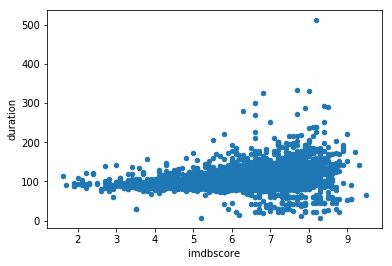

In [1081]:
# Is there a relation between the imdb score and the duration of a movie? 

df.plot.scatter(x='imdbscore', y='duration')

- The higher the imdb score the longert the movie was. 

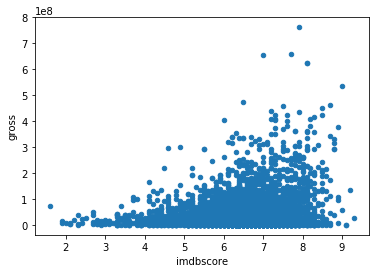

In [1082]:
# Relation between imdb score and gross amount

df.plot.scatter(x='imdbscore', y='gross')

- As expected the movies with higer score were able to make more money when released 

# Correlation Analysis 

In [1083]:
corr = pd.DataFrame(df.corr()['imdbscore'].drop('imdbscore'))
corr.sort_values(['imdbscore'], ascending = False)

,imdbscore
numvotedusers,0.410965
numcriticforreviews,0.302807
numuserforreviews,0.292475
duration,0.260890
moviefacebooklikes,0.247049
gross,0.198021
directorfacebooklikes,0.170802
casttotalfacebooklikes,0.085787
actor2facebooklikes,0.083808
actor1facebooklikes,0.076099


#### Explaining the results 

The most important categories in the success of a movie are: 

- Number of users who gave a review
- Number of critical reviews on imdb 
- Duration
- Number of facebook likes in the movie page 
- Gross earnings of the movie in dollars
- Number of likes of the director on his facebook page 

While the number of actors in a poster and the year of the movie don't have any correlation with the success of a movie

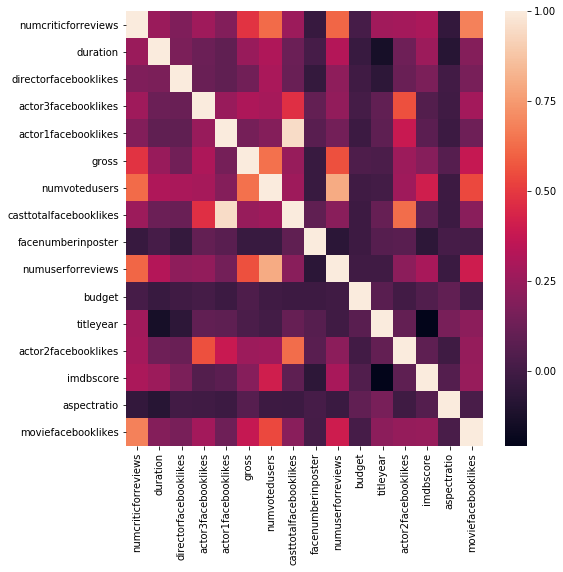

In [1084]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr())

In [1085]:
df.groupby('imdbscore').mean()

,numcriticforreviews,duration,directorfacebooklikes,actor3facebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,facenumberinposter,numuserforreviews,budget,titleyear,actor2facebooklikes,aspectratio,moviefacebooklikes
imdbscore,,,,,,,,,,,,,,,
1.6,84.000000,115.000000,209.000000,41.000000,569.000000,7.300094e+07,7.435100e+04,714.000000,1.000000,233.000000,1.300000e+07,2011.000000,69.000000,1.850000,62000.000000
1.7,12.000000,91.000000,11.000000,500.000000,719.000000,NaN,4.377000e+03,3090.000000,0.000000,66.000000,6.500000e+07,2012.000000,611.000000,2.220000,0.000000
1.9,48.666667,91.000000,55.333333,200.000000,719.333333,1.164199e+07,3.361667e+04,1796.000000,1.666667,165.666667,1.533333e+07,2005.666667,456.333333,1.993333,42.666667
2.0,16.000000,101.500000,44.000000,437.000000,807.000000,5.694308e+06,8.547000e+03,2926.500000,2.000000,34.000000,1.550000e+07,2010.500000,752.000000,2.100000,223.000000
2.1,50.333333,96.333333,64.666667,236.000000,617.666667,5.401735e+06,1.724167e+04,1766.333333,3.000000,216.000000,1.320000e+07,2003.333333,292.333333,2.016667,81.333333
2.2,28.666667,99.666667,184.666667,232.000000,435.333333,1.701065e+07,1.389233e+04,1260.666667,0.333333,89.666667,1.606667e+08,2010.666667,331.333333,1.950000,461.333333
2.3,90.666667,94.000000,339.000000,473.666667,745.333333,1.505900e+07,4.415200e+04,3448.000000,4.000000,416.333333,1.666667e+07,2003.333333,650.333333,2.016667,574.666667
2.4,152.500000,120.000000,83.000000,42.000000,430.000000,1.356588e+07,5.354200e+04,628.500000,0.000000,863.000000,4.900000e+07,2001.500000,89.500000,2.350000,1000.000000
2.5,25.000000,95.000000,45.500000,427.500000,624.000000,2.714196e+07,1.007450e+04,1783.500000,1.000000,93.000000,2.075000e+08,2003.500000,505.000000,1.850000,388.500000


# Storytelling 

Based on the different data tests it has been found that there are certain variable that can help to determine the success of a movie.

The following categories highly affect how successful a movie is: 
- Number of users who gave a review
- Number of critical reviews on imdb 
- Duration
- Number of facebook likes in the movie page 
- Gross earnings of the movie in dollars
- Number of likes of the director on his facebook page 

While these categories DO NOT affect the success or failure of a movie:

- Actors in a poster
- Year of the movie

This means that clients should take into consideration the variables that highly correlate with the imdb scores in order to determine if a movie is going to be successful. 

# Building Regression 

In [1086]:
import pandas as pd 
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1087]:
df.columns

Index([u'directorname', u'numcriticforreviews', u'duration',
       u'directorfacebooklikes', u'actor3facebooklikes', u'actor2name',
       u'actor1facebooklikes', u'gross', u'genres', u'actor1name',
       u'movietitle', u'numvotedusers', u'casttotalfacebooklikes',
       u'actor3name', u'facenumberinposter', u'numuserforreviews', u'language',
       u'country', u'budget', u'titleyear', u'actor2facebooklikes',
       u'imdbscore', u'aspectratio', u'moviefacebooklikes'],
      dtype='object')

In [1088]:
df = df.drop(['directorname','language', 'country', 'titleyear', 'actor2name', 'actor1name','actor3name', 'actor3facebooklikes', 'actor2facebooklikes', 'facenumberinposter'], axis=1)
df.head()

,numcriticforreviews,duration,directorfacebooklikes,actor1facebooklikes,gross,genres,movietitle,numvotedusers,casttotalfacebooklikes,numuserforreviews,budget,imdbscore,aspectratio,moviefacebooklikes
0,723.0,178.0,0.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,4834,3054.0,237000000.0,7.9,1.78,33000
1,302.0,169.0,563.0,40000.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,48350,1238.0,300000000.0,7.1,2.35,0
2,602.0,148.0,0.0,11000.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,11700,994.0,245000000.0,6.8,2.35,85000
3,813.0,164.0,22000.0,27000.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,106759,2701.0,250000000.0,8.5,2.35,164000
4,140.0,107.0,131.0,131.0,NaN,Documentary,Star Wars: Episode VII - The Force Awakens,8,143,NaN,397000000.0,7.1,2.22,0


In [1089]:
df = df.drop(['movietitle', 'genres'], axis=1)
df.head()

,numcriticforreviews,duration,directorfacebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,numuserforreviews,budget,imdbscore,aspectratio,moviefacebooklikes
0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,7.9,1.78,33000
1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,7.1,2.35,0
2,602.0,148.0,0.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,6.8,2.35,85000
3,813.0,164.0,22000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,8.5,2.35,164000
4,140.0,107.0,131.0,131.0,NaN,8,143,NaN,397000000.0,7.1,2.22,0


In [1090]:
#remove missing values
df = df.dropna()
df.isnull().sum()

numcriticforreviews       0
duration                  0
directorfacebooklikes     0
actor1facebooklikes       0
gross                     0
numvotedusers             0
casttotalfacebooklikes    0
numuserforreviews         0
budget                    0
imdbscore                 0
aspectratio               0
moviefacebooklikes        0
dtype: int64

### Multiple Regression Model 

In [1091]:
# deine x & y 
#assigning columns to X and Y variables
y = df['imdbscore'] 
X = df[['numcriticforreviews','duration','directorfacebooklikes','actor1facebooklikes','gross','numvotedusers','casttotalfacebooklikes','numuserforreviews','budget','aspectratio','moviefacebooklikes']]

In [1092]:
y.head(2)

0    7.9
1    7.1
Name: imdbscore, dtype: float64

In [1093]:
X.head(2)

,numcriticforreviews,duration,directorfacebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,numuserforreviews,budget,aspectratio,moviefacebooklikes
0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,1.78,33000
1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2.35,0


In [1094]:
#create a multiple regression model 
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [1095]:
model1.coef_

array([ 1.65276271e-03,  1.18247233e-02,  8.47422026e-06,  1.27158299e-05,
       -2.36760194e-09,  4.04737675e-06, -1.18188838e-05, -5.63167199e-04,
        8.07758614e-11, -1.80202894e-01, -2.84978643e-06])

In [1096]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [ 1.65276271e-03  1.18247233e-02  8.47422026e-06  1.27158299e-05
 -2.36760194e-09  4.04737675e-06 -1.18188838e-05 -5.63167199e-04
  8.07758614e-11 -1.80202894e-01 -2.84978643e-06]
y-intercept  5.234086292532781


In [1097]:
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

,0,1
0,numcriticforreviews,1.652763e-03
1,duration,1.182472e-02
2,directorfacebooklikes,8.474220e-06
3,actor1facebooklikes,1.271583e-05
4,gross,-2.367602e-09
5,numvotedusers,4.047377e-06
6,casttotalfacebooklikes,-1.181888e-05
7,numuserforreviews,-5.631672e-04
8,budget,8.077586e-11
9,aspectratio,-1.802029e-01


In [1098]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('numcriticforreviews', '0.002'),
 ('duration', '0.012'),
 ('directorfacebooklikes', '0.000'),
 ('actor1facebooklikes', '0.000'),
 ('gross', '-0.000'),
 ('numvotedusers', '0.000'),
 ('casttotalfacebooklikes', '-0.000'),
 ('numuserforreviews', '-0.001'),
 ('budget', '0.000'),
 ('aspectratio', '-0.180'),
 ('moviefacebooklikes', '-0.000')]

In [1099]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.7736433446104383
variance or r-squared:  0.29913965270756493


### Random Forest Regressor 

In [1100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
y = df['imdbscore'] 
X = df[['numcriticforreviews','duration','directorfacebooklikes','actor1facebooklikes','gross','numvotedusers','casttotalfacebooklikes','numuserforreviews','budget','aspectratio','moviefacebooklikes']]

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.10487248855697422
variance or r-squared:  0.9050274094525834


In [1101]:
#sort by importance
sorted(zip(regr.feature_importances_, X.columns), reverse=True)

[(0.3199764748152382, 'numvotedusers'),
 (0.11689260414847327, 'duration'),
 (0.11070529837686904, 'budget'),
 (0.09883742833606082, 'gross'),
 (0.07612312522136155, 'numuserforreviews'),
 (0.07008746009803227, 'numcriticforreviews'),
 (0.06850046042288906, 'casttotalfacebooklikes'),
 (0.04715471895171443, 'directorfacebooklikes'),
 (0.04232670112094655, 'moviefacebooklikes'),
 (0.03764927969156047, 'actor1facebooklikes'),
 (0.01174644881685436, 'aspectratio')]

### Lasso Regression Model 

In [1102]:
#Fit the model
model1 = lm.Lasso(alpha=0.1)    
model1.fit(X, y)
model1_y = model1.predict(X)

In [1103]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [ 1.53371791e-03  1.12037042e-02  8.68143974e-06  1.27015458e-05
 -2.33970250e-09  4.07079690e-06 -1.18841884e-05 -5.55936433e-04
  8.23101321e-11 -0.00000000e+00 -2.70268583e-06]
y-intercept  4.934390199250469


In [1104]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('numcriticforreviews', '0.002'),
 ('duration', '0.011'),
 ('directorfacebooklikes', '0.000'),
 ('actor1facebooklikes', '0.000'),
 ('gross', '-0.000'),
 ('numvotedusers', '0.000'),
 ('casttotalfacebooklikes', '-0.000'),
 ('numuserforreviews', '-0.001'),
 ('budget', '0.000'),
 ('aspectratio', '-0.000'),
 ('moviefacebooklikes', '-0.000')]

In [1105]:
sorted(zip(coef, xcolumns), reverse=True)

[('0.011', 'duration'),
 ('0.002', 'numcriticforreviews'),
 ('0.000', 'numvotedusers'),
 ('0.000', 'directorfacebooklikes'),
 ('0.000', 'budget'),
 ('0.000', 'actor1facebooklikes'),
 ('-0.001', 'numuserforreviews'),
 ('-0.000', 'moviefacebooklikes'),
 ('-0.000', 'gross'),
 ('-0.000', 'casttotalfacebooklikes'),
 ('-0.000', 'aspectratio')]

In [1106]:
a = zip(xcolumns, coef)
df= pd.DataFrame(a)
df.sort_values(1, ascending=False)

,0,1
1,duration,0.011
0,numcriticforreviews,0.002
2,directorfacebooklikes,0.000
3,actor1facebooklikes,0.000
5,numvotedusers,0.000
8,budget,0.000
7,numuserforreviews,-0.001
4,gross,-0.000
6,casttotalfacebooklikes,-0.000
9,aspectratio,-0.000


In [1107]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.7773630133314352
variance or r-squared:  0.29576992383989986


### Ridge Regression Model 

In [1108]:
#Fit the model
rig = lm.Ridge(alpha=0.4)         
rig.fit(X, y)
rig_y = rig.predict(X)

In [1109]:
print 'Coefficients: ', rig.coef_
print "y-intercept ", rig.intercept_

Coefficients:  [ 1.65267988e-03  1.18243983e-02  8.47426953e-06  1.27158447e-05
 -2.36758188e-09  4.04739674e-06 -1.18189754e-05 -5.63166717e-04
  8.07762530e-11 -1.80050303e-01 -2.84973126e-06]
y-intercept  5.233810531391235


In [1110]:
coef = ["%.3f" % i for i in rig.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('numcriticforreviews', '0.002'),
 ('duration', '0.012'),
 ('directorfacebooklikes', '0.000'),
 ('actor1facebooklikes', '0.000'),
 ('gross', '-0.000'),
 ('numvotedusers', '0.000'),
 ('casttotalfacebooklikes', '-0.000'),
 ('numuserforreviews', '-0.001'),
 ('budget', '0.000'),
 ('aspectratio', '-0.180'),
 ('moviefacebooklikes', '-0.000')]

In [1111]:
sorted(zip(coef, xcolumns), reverse=True)

[('0.012', 'duration'),
 ('0.002', 'numcriticforreviews'),
 ('0.000', 'numvotedusers'),
 ('0.000', 'directorfacebooklikes'),
 ('0.000', 'budget'),
 ('0.000', 'actor1facebooklikes'),
 ('-0.180', 'aspectratio'),
 ('-0.001', 'numuserforreviews'),
 ('-0.000', 'moviefacebooklikes'),
 ('-0.000', 'gross'),
 ('-0.000', 'casttotalfacebooklikes')]

In [1112]:
a = zip(xcolumns, coef)
df= pd.DataFrame(a)
df.sort_values(1, ascending=False)

,0,1
1,duration,0.012
0,numcriticforreviews,0.002
2,directorfacebooklikes,0.000
3,actor1facebooklikes,0.000
5,numvotedusers,0.000
8,budget,0.000
9,aspectratio,-0.180
7,numuserforreviews,-0.001
4,gross,-0.000
6,casttotalfacebooklikes,-0.000


In [1113]:
print "mean square error: ", mean_squared_error(y, rig_y)
print "variance or r-squared: ", explained_variance_score(y, rig_y)


mean square error:  0.7736433472582819
variance or r-squared:  0.2991396503088257


### Feature Selection Model 

In [777]:
#selec only 2 X variables
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[1.78000e+02, 8.86204e+05],
       [1.69000e+02, 4.71220e+05],
       [1.48000e+02, 2.75868e+05],
       ...,
       [9.50000e+01, 1.33800e+03],
       [1.00000e+02, 1.25500e+03],
       [9.00000e+01, 4.28500e+03]])

In [778]:
df.head(2)

,0,1
0,numcriticforreviews,0.002
1,duration,0.012


In [779]:
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

mean square error:  0.8261328406736405
variance or r-squared:  0.25158827558225005


# Classification 

In [1018]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.tools import plotting
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
#from graphviz import Source
from IPython.display import display
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#pip install scikit-plot (optional)
import scikitplot as skplt

### Data Transformation 

In [1019]:
df.head()

,numcriticforreviews,duration,directorfacebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,numuserforreviews,budget,imdbscore,aspectratio,moviefacebooklikes
0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,7.9,1.78,33000
1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,7.1,2.35,0
2,602.0,148.0,0.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,6.8,2.35,85000
3,813.0,164.0,22000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,8.5,2.35,164000
5,462.0,132.0,475.0,640.0,73058679.0,212204,1873,738.0,263700000.0,6.6,2.35,24000


In [1020]:
# Create a new column (imdb_score_category):
df['imdbscorecategory'] = 1
df.loc[(df['imdbscore'] > 4) & (df['imdbscore'] <= 6), 'imdbscorecategory'] = 2
df.loc[(df['imdbscore'] > 6) & (df['imdbscore'] <= 8), 'imdbscorecategory'] = 3
df.loc[df['imdbscore'] > 8, 'imdbscorecategory'] = 4
df.head()

,numcriticforreviews,duration,directorfacebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,numuserforreviews,budget,imdbscore,aspectratio,moviefacebooklikes,imdbscorecategory
0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,7.9,1.78,33000,3
1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,7.1,2.35,0,3
2,602.0,148.0,0.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,6.8,2.35,85000,3
3,813.0,164.0,22000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,8.5,2.35,164000,4
5,462.0,132.0,475.0,640.0,73058679.0,212204,1873,738.0,263700000.0,6.6,2.35,24000,3


In [1021]:
# Drop column imdbscore
df = df.drop(['imdbscore'], axis=1)
df.head()

,numcriticforreviews,duration,directorfacebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,numuserforreviews,budget,aspectratio,moviefacebooklikes,imdbscorecategory
0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,1.78,33000,3
1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2.35,0,3
2,602.0,148.0,0.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2.35,85000,3
3,813.0,164.0,22000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,2.35,164000,4
5,462.0,132.0,475.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2.35,24000,3


### Decision Tree Model 

In [1022]:
# declare X variables and y variable
y = df['imdbscorecategory']
X = df.drop(['numcriticforreviews','duration','directorfacebooklikes','actor1facebooklikes','gross','numvotedusers','casttotalfacebooklikes','numuserforreviews','budget','aspectratio','moviefacebooklikes'], axis=1)

In [1023]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1024]:
print len(X_train), len(y_train) 
print len(X_test), len(y_test) 

2905 2905
1246 1246


In [1025]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from scipy import interp


In [1026]:
#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

1.0
--------------------------------------------------------
[[ 25   0   0   0]
 [  0 354   0   0]
 [  0   0 819   0]
 [  0   0   0  48]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        25
          2       1.00      1.00      1.00       354
          3       1.00      1.00      1.00       819
          4       1.00      1.00      1.00        48

avg / total       1.00      1.00      1.00      1246

--------------------------------------------------------


ValueError: multiclass format is not supported

In [1027]:
!pip install scikit-plot

distributed 1.21.8 requires msgpack, which is not installed.
grin 1.2.1 requires argparse>=1.1, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


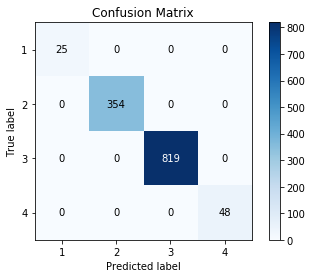

In [1028]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

In [1029]:
# Visualizing decision tree
tree.export_graphviz(dt, out_file='data/decisiontree.dot', feature_names=X.columns)

In [1030]:
from IPython.display import Image
Image("data/decisiontree.png")

In [1031]:
from IPython.display import Image
Image("data/decisiontree_w_notes.png")

In [1032]:
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt.pdf")

True

### KNN Model 

In [1033]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [1034]:
#Model evaluation with split valdation

print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, knn.predict(X_test))

1.0
--------------------------------------------------------
[[ 25   0   0   0]
 [  0 354   0   0]
 [  0   0 819   0]
 [  0   0   0  48]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        25
          2       1.00      1.00      1.00       354
          3       1.00      1.00      1.00       819
          4       1.00      1.00      1.00        48

avg / total       1.00      1.00      1.00      1246

--------------------------------------------------------


ValueError: multiclass format is not supported

### Logistic Regression Model 

In [1035]:
#evaluate with logitic regression model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1036]:
#Model evaluation

print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.9414125200642055
--------------------------------------------------------
[[  0  25   0   0]
 [  0 354   0   0]
 [  0   0 819   0]
 [  0   0  48   0]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        25
          2       0.93      1.00      0.97       354
          3       0.94      1.00      0.97       819
          4       0.00      0.00      0.00        48

avg / total       0.89      0.94      0.91      1246

--------------------------------------------------------


C:\python2.7\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: multiclass format is not supported

### Random Forest Classifier 

In [1037]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [1038]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, clf.predict(X_test)) #overall accuracy
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))

1.0
[[ 25   0   0   0]
 [  0 354   0   0]
 [  0   0 819   0]
 [  0   0   0  48]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        25
          2       1.00      1.00      1.00       354
          3       1.00      1.00      1.00       819
          4       1.00      1.00      1.00        48

avg / total       1.00      1.00      1.00      1246



### Feature Selection 

In [1039]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns))

Features sorted by their rank:
[(1.0, 'imdbscorecategory')]


In [1040]:
# rank important factors 
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).\
                                                    sort_values('importance',ascending=False)

,feature,importance
0,imdbscorecategory,1.0


# Clustering 

In [1045]:
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [1046]:
#variance test 
df.var()

numcriticforreviews       1.501612e+04
duration                  5.017993e+02
directorfacebooklikes     8.690801e+06
actor1facebooklikes       2.266903e+08
gross                     4.690340e+15
numvotedusers             2.171069e+10
casttotalfacebooklikes    3.433380e+08
numuserforreviews         1.596959e+05
budget                    5.370163e+16
aspectratio               1.192941e-01
moviefacebooklikes        4.328563e+08
imdbscorecategory         3.359352e-01
dtype: float64

In [1047]:
# Normalize Data 

df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.head()

,numcriticforreviews,duration,directorfacebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,numuserforreviews,budget,aspectratio,moviefacebooklikes,imdbscorecategory
0,0.693931,0.231336,-0.032523,-0.009923,0.936146,0.466657,-0.009240,0.541743,0.013873,-0.022207,0.069496,0.095800
1,0.175458,0.200931,-0.008045,0.051014,0.342986,0.221070,0.057022,0.182779,0.019031,0.016254,-0.025060,0.095800
2,0.544916,0.129985,-0.032523,0.005702,0.199226,0.105460,0.001215,0.134548,0.014528,0.016254,0.218493,0.095800
3,0.804768,0.184039,0.923999,0.030702,0.525399,0.619421,0.145961,0.471966,0.014937,0.016254,0.444854,0.429134
5,0.372502,0.075931,-0.011871,-0.010486,0.032212,0.067784,-0.013749,0.083945,0.016059,0.016254,0.043708,0.095800


In [1048]:
df_norm.var()

numcriticforreviews       0.022774
duration                  0.005727
directorfacebooklikes     0.016429
actor1facebooklikes       0.000553
gross                     0.008110
numvotedusers             0.007604
casttotalfacebooklikes    0.000796
numuserforreviews         0.006240
budget                    0.000360
aspectratio               0.000543
moviefacebooklikes        0.003554
imdbscorecategory         0.037326
dtype: float64

In [1049]:
# clustering analysis using k-means

k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [1050]:
# cluster labels

k_means.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [1051]:
# find out cluster centers

k_means.cluster_centers_

array([[-0.05719966, -0.02913478, -0.02256328, -0.00236176, -0.0178859 ,
        -0.03497536, -0.00312234, -0.02173748, -0.00070955, -0.00145488,
        -0.01477805, -0.26511202],
       [ 0.0248445 ,  0.0126546 ,  0.00980029,  0.00102582,  0.00776868,
         0.01519144,  0.00135618,  0.00944161,  0.00030819,  0.00063192,
         0.0064188 ,  0.11515059]])

In [1052]:
# convert cluster lables to dataframe

df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [1053]:
# join df_norm & df1

df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

,numcriticforreviews,duration,directorfacebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,numuserforreviews,budget,aspectratio,moviefacebooklikes,imdbscorecategory,cluster
0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,1.78,33000,3,1
1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2.35,0,3,1
2,602.0,148.0,0.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2.35,85000,3,1
3,813.0,164.0,22000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,2.35,164000,4,1
4,462.0,132.0,475.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2.35,24000,3,1


In [1054]:
df2.groupby(['cluster']).mean() 

,numcriticforreviews,duration,directorfacebooklikes,actor1facebooklikes,gross,numvotedusers,casttotalfacebooklikes,numuserforreviews,budget,aspectratio,moviefacebooklikes,imdbscorecategory
cluster,,,,,,,,,,,,
0,113.081941,100.900557,229.076372,5839.264916,3.495915e+07,38565.638823,8851.669053,203.352426,5.886370e+07,2.087550,3588.488465,1.917263
1,179.701797,113.270214,973.438493,8007.319627,5.446961e+07,123335.452315,11792.843815,361.087422,7.129594e+07,2.118476,10986.189703,3.058051


# Storytelling 

- After running several tests in order to predict which movies will be successful I have to the conclusion that the best model to use would the feature selection model as it had 82.61% accuracy. 
- During the classification analysis I found that the random forest would be the bes model for the client to use 
- Thanks to the diffferent models I was also able to find that the following variables are the most relevant for the prediction of the success of a movie:
    - number of voted users
    - duration 
    - budget
    - gross earnings 
 

## Diana Ortiz 
"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."